In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import plotly
import plotly.express as px
import plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [71]:
df_train_full = pd.read_csv("./../dth_data_1.csv")

In [72]:
df_train_full

,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn
0,Autumn Jackson,"1166 Max Pine,Selenastad, OR 84999",Nicholasview,001-299-668-9887x055,Standard,True,Individual,None,350,400,1245,315,False
1,Tiffany Molina,"2897 Kari Skyway,Thomasside, ID 62645",New Davidtown,986-452-8168x704,HD,True,Individual,None,500,450,164,77,False
2,Andre King,"9308 Williams Islands,Shawnborough, UT 79074",Michaelshire,+1-652-466-9356x692,HD,True,Individual,None,500,450,773,27,True
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kenneth Meadows,"257 Gonzalez Plaza Suite 874,Jenniferberg, TX ...",West Douglasbury,(099)701-9100x92220,Standard,True,Individual,None,350,400,1931,842,False
9996,James Barrett,"095 Richard Path,Heatherfort, NC 16640",Christinefurt,7611399892,Standard,False,Individual,Other,350,400,0,8299,False
9997,Barbara Torres,"6232 Melissa Valleys Apt. 625,Whitebury, NV 73519",West Anthonyville,(254)791-1312,UHD,False,Commercial,Hulu,700,500,0,2635,False
9998,James Williams,"49214 Sierra Brook Apt. 166,Port Jessica, IL 2...",Port Jennifertown,336.043.6761x397,HD,True,Home,None,500,450,1436,627,False


In [73]:
df_train_full.columns

Index(['names', 'address', 'city', 'phone_number', 'dth_pack',
       'subscription_status', 'customer_class', 'ott_subscription',
       'dth_pack_price', 'no_of_channels', 'active_since', 'viewtime',
       'churn'],
      dtype='object')

In [74]:
cols = df_train_full.columns.to_list()

In [75]:
cols

['names',
 'address',
 'city',
 'phone_number',
 'dth_pack',
 'subscription_status',
 'customer_class',
 'ott_subscription',
 'dth_pack_price',
 'no_of_channels',
 'active_since',
 'viewtime',
 'churn']

In [76]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   names                10000 non-null  object
 1   address              10000 non-null  object
 2   city                 10000 non-null  object
 3   phone_number         10000 non-null  object
 4   dth_pack             10000 non-null  object
 5   subscription_status  10000 non-null  bool  
 6   customer_class       10000 non-null  object
 7   ott_subscription     10000 non-null  object
 8   dth_pack_price       10000 non-null  int64 
 9   no_of_channels       10000 non-null  int64 
 10  active_since         10000 non-null  int64 
 11  viewtime             10000 non-null  int64 
 12  churn                10000 non-null  bool  
dtypes: bool(2), int64(4), object(7)
memory usage: 879.0+ KB


In [77]:
len(df_train_full)

10000

In [78]:
df_train_full.isnull().sum()  ## no missing values

names                  0
address                0
city                   0
phone_number           0
dth_pack               0
subscription_status    0
customer_class         0
ott_subscription       0
dth_pack_price         0
no_of_channels         0
active_since           0
viewtime               0
churn                  0
dtype: int64

In [79]:
cat_cols = [cname for cname in df_train_full.columns if (df_train_full[cname].dtype=="object" or df_train_full[cname].dtype=="bool") and df_train_full[cname].nunique()<20]
num_cols = [cname for cname in df_train_full.columns if df_train_full[cname].dtype=="int64"]

In [80]:
cat_cols

['dth_pack',
 'subscription_status',
 'customer_class',
 'ott_subscription',
 'churn']

In [81]:
num_cols

['dth_pack_price', 'no_of_channels', 'active_since', 'viewtime']

In [82]:
df_Xtrain = df_train_full[num_cols+cat_cols]

In [83]:
df_Xtrain

,dth_pack_price,no_of_channels,active_since,viewtime,dth_pack,subscription_status,customer_class,ott_subscription,churn
0,350,400,1245,315,Standard,True,Individual,None,False
1,500,450,164,77,HD,True,Individual,None,False
2,500,450,773,27,HD,True,Individual,None,True
3,500,450,0,5632,HD,False,Home,Hulu,True
4,350,400,814,91,Standard,True,Home,Netflix,False
...,...,...,...,...,...,...,...,...,...
9995,350,400,1931,842,Standard,True,Individual,None,False
9996,350,400,0,8299,Standard,False,Individual,Other,False
9997,700,500,0,2635,UHD,False,Commercial,Hulu,False
9998,500,450,1436,627,HD,True,Home,None,False


In [84]:
df_Xtrain.isnull().sum()  # no missing values

dth_pack_price         0
no_of_channels         0
active_since           0
viewtime               0
dth_pack               0
subscription_status    0
customer_class         0
ott_subscription       0
churn                  0
dtype: int64

In [85]:
## handling boolean categorical variables

df_Xtrain["subscription_status"] = df_Xtrain["subscription_status"].astype('category')
df_Xtrain["subscription_status"] = df_Xtrain["subscription_status"].cat.codes
df_Xtrain["subscription_status"] = df_Xtrain["subscription_status"].astype('int64')


In [86]:
df_Xtrain["churn"] = df_Xtrain["churn"].astype('category')
df_Xtrain["churn"] = df_Xtrain["churn"].cat.codes
df_Xtrain["churn"] = df_Xtrain["churn"].astype('int64')


In [87]:
df_Xtrain

,dth_pack_price,no_of_channels,active_since,viewtime,dth_pack,subscription_status,customer_class,ott_subscription,churn
0,350,400,1245,315,Standard,1,Individual,None,0
1,500,450,164,77,HD,1,Individual,None,0
2,500,450,773,27,HD,1,Individual,None,1
3,500,450,0,5632,HD,0,Home,Hulu,1
4,350,400,814,91,Standard,1,Home,Netflix,0
...,...,...,...,...,...,...,...,...,...
9995,350,400,1931,842,Standard,1,Individual,None,0
9996,350,400,0,8299,Standard,0,Individual,Other,0
9997,700,500,0,2635,UHD,0,Commercial,Hulu,0
9998,500,450,1436,627,HD,1,Home,None,0


In [88]:
df_Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dth_pack_price       10000 non-null  int64 
 1   no_of_channels       10000 non-null  int64 
 2   active_since         10000 non-null  int64 
 3   viewtime             10000 non-null  int64 
 4   dth_pack             10000 non-null  object
 5   subscription_status  10000 non-null  int64 
 6   customer_class       10000 non-null  object
 7   ott_subscription     10000 non-null  object
 8   churn                10000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 703.2+ KB


In [89]:
df_Xtrain.dropna(axis=0,subset=["churn"],inplace = True)

In [90]:
X = df_Xtrain
y = df_Xtrain.churn
X.drop(["churn"],axis = 1, inplace = True)

In [91]:
X

,dth_pack_price,no_of_channels,active_since,viewtime,dth_pack,subscription_status,customer_class,ott_subscription
0,350,400,1245,315,Standard,1,Individual,None
1,500,450,164,77,HD,1,Individual,None
2,500,450,773,27,HD,1,Individual,None
3,500,450,0,5632,HD,0,Home,Hulu
4,350,400,814,91,Standard,1,Home,Netflix
...,...,...,...,...,...,...,...,...
9995,350,400,1931,842,Standard,1,Individual,None
9996,350,400,0,8299,Standard,0,Individual,Other
9997,700,500,0,2635,UHD,0,Commercial,Hulu
9998,500,450,1436,627,HD,1,Home,None


In [92]:
y

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: churn, Length: 10000, dtype: int64

In [93]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2,random_state =0)

In [94]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [95]:

categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
# X_test = X_test[my_cols].copy()

In [96]:
categorical_cols

['dth_pack', 'customer_class', 'ott_subscription']

In [97]:
numerical_cols

['dth_pack_price',
 'no_of_channels',
 'active_since',
 'viewtime',
 'subscription_status']

In [98]:
## model training 

In [170]:


scaler = StandardScaler()

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])


preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_cols)
])


model_rf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=30)
model_en = ElasticNet(random_state=0)
model_gb = XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=0,n_jobs=-1)


my_pipeline = Pipeline(steps=[
    ('pre',preprocessor),
    ('sc',scaler),    
    ('gb',model_gb)
    
])

pipeline_rf = Pipeline(steps=[
    ('pre',preprocessor),
    ('sc',scaler),
    ('rf',model_rf)
])

parameters = {'gb__n_estimators':[i for i in range(500,1000,100)],
              'gb__learning_rate':[0.1,0.2,0.05,0.07],
             
             }

params_rf ={
     'rf__n_estimators':[i for i in range(200,1000,100)]
}

In [171]:
# cv = GridSearchCV(pipeline_rf,params_rf,cv=10,n_jobs=-1)
cv = GridSearchCV(my_pipeline,parameters,cv=10,n_jobs=-1)


In [172]:
cv.fit(X_train,y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='constant'),
                                                                         ['dth_pack_price',
                                                                          'no_of_channels',
                                                                          'active_since',
                                                                          'viewtime',
                                                                          'subscription_status']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(s

In [173]:
preds = cv.predict(X_valid)


In [174]:
mae = mean_absolute_error(y_valid,preds)
mae

0.319

In [175]:
cv.best_params_


{'gb__learning_rate': 0.05, 'gb__n_estimators': 500}

In [176]:
accuracy_score(y_valid,preds)

0.681

In [177]:
# from sklearn.preprocessing import StandardScaler
# data = [[1,1], [2,3], [3,2], [1,1]]
# scaler = StandardScaler()
# scaler.fit(data)
# scaled = scaler.transform(data)
# print(scaled)

# # for inverse transformation
# inversed = scaler.inverse_transform(scaled)
# print(inversed)

In [178]:
confusion_matrix(y_valid,preds)

array([[1331,   59],
       [ 579,   31]], dtype=int64)

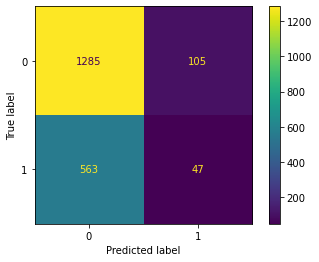

In [150]:
plot_confusion_matrix(cv,X_valid,y_valid)

In [151]:
r2_score(y_valid,preds)

-0.5756575067814602